I am a header
--------------------

Stuff we need to do
* @ rahayu go through the paper and list the steps doug took to do the analysis (how to breakdown tasks)
* yay
* wow

In [1]:
import numpy  as np
import pandas as pd
import csv as yay
import math

import matplotlib.pyplot as plt

In [12]:
path = '../data/trobit_vcf_comparison.csv'

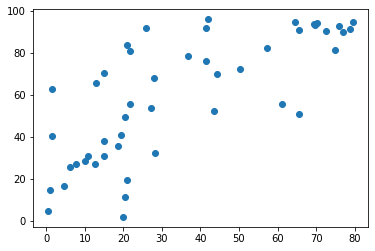

In [14]:
df = pd.read_csv(path)
plt.scatter(df['mvcf_pct'], df['trobit_pct'])